In [1]:
import pyvips
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pathlib import Path
import pandas as pd
import cv2
from src.tools import *
# load the full-resolution image

In [2]:
data_path = Path('/home/sheh/datasets/TissueNet')

In [3]:
df_label = pd.read_csv(data_path / 'train_labels.csv')
df_label.head()

filename  0  1  2  3
0  C06_B108_S21.tif  0  0  0  1
1  C13_B156_S11.tif  0  0  0  1
2  C13_B145_S11.tif  0  0  0  1
3  C13_B141_S11.tif  0  0  0  1
4  C06_B116_S21.tif  0  0  0  1

In [4]:
train_annot = pd.read_csv(data_path / 'train_annotations.csv')

In [7]:
train_annot.head()

annotation_id          filename  \
121   C13_B149_S11_3  C13_B149_S11.tif   
4867  C04_B033_S04_0  C04_B033_S04.tif   
1348  C14_B081_S11_5  C14_B081_S11.tif   
4680  C11_B089_S11_6  C11_B089_S11.tif   
5687  C12_B184_S12_4  C12_B184_S12.tif   
4311  C12_B399_S12_3  C12_B399_S12.tif   
661   C01_B248_S01_4  C01_B248_S01.tif   
2853  C07_B084_S21_3  C07_B084_S21.tif   
4779  C11_B079_S11_4  C11_B079_S11.tif   
4305  C12_B400_S12_2  C12_B400_S12.tif   

                                               geometry  annotation_class  \
121   POLYGON ((26277.53186579447 154401.5318657945,...                 2   
4867  POLYGON ((5319.660327963529 8892.85880224836, ...                 2   
1348  POLYGON ((213113.5318657945 173717.5318657945,...                 2   
4680  POLYGON ((62957.53186579447 164300.2818657945,...                 1   
5687  POLYGON ((45963.82998602344 22097.82998602344,...                 3   
4311  POLYGON ((14280.82998602344 12651.82998602344,...                 0   
661   POLYGON ((19489.6999934035 14755.2999934035, 1...                 0   
2853  POLYGON ((21465.71498739524 11190.90248739524,...                 2   
4779  POLYGON ((46314.25257733823 239110.0490357177,...                 2   
4305  POLYGON ((92305.82998602344 6675.829986023442,...                 0   

                                            us_jpeg_url  \
121   s3://drivendata-competition-sfp-public/train/a...   
4867  s3://drivendata-competition-sfp-public/train/a...   
1348  s3://drivendata-competition-sfp-public/train/a...   
4680  s3://drivendata-competition-sfp-public/train/a...   
5687  s3://drivendata-competition-sfp-public/train/a...   
4311  s3://drivendata-competition-sfp-public/train/a...   
661   s3://drivendata-competition-sfp-public/train/a...   
2853  s3://drivendata-competition-sfp-public/train/a...   
4779  s3://drivendata-competition-sfp-public/train/a...   
4305  s3://drivendata-competition-sfp-public/train/a...   

                                            eu_jpeg_url  \
121   s3://drivendata-competition-sfp-public-eu/trai...   
4867  s3://drivendata-competition-sfp-public-eu/trai...   
1348  s3://drivendata-competition-sfp-public-eu/trai...   
4680  s3://drivendata-competition-sfp-public-eu/trai...   
5687  s3://drivendata-competition-sfp-public-eu/trai...   
4311  s3://drivendata-competition-sfp-public-eu/trai...   
661   s3://drivendata-competition-sfp-public-eu/trai...   
2853  s3://drivendata-competition-sfp-public-eu/trai...   
4779  s3://drivendata-competition-sfp-public-eu/trai...   
4305  s3://drivendata-competition-sfp-public-eu/trai...   

                                          asia_jpeg_url  
121   s3://drivendata-competition-sfp-public-asia/tr...  
4867  s3://drivendata-competition-sfp-public-asia/tr...  
1348  s3://drivendata-competition-sfp-public-asia/tr...  
4680  s3://drivendata-competition-sfp-public-asia/tr...  
5687  s3://drivendata-competition-sfp-public-asia/tr...  
4311  s3://drivendata-competition-sfp-public-asia/tr...  
661   s3://drivendata-competition-sfp-public-asia/tr...  
2853  s3://drivendata-competition-sfp-public-asia/tr...  
4779  s3://drivendata-competition-sfp-public-asia/tr...  
4305  s3://drivendata-competition-sfp-public-asia/tr...

In [11]:
train_annot.groupby("annotation_class").filename.count().values.min()

1230

In [6]:
train_annot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926 entries, 0 to 5925
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   annotation_id     5926 non-null   object
 1   filename          5926 non-null   object
 2   geometry          5926 non-null   object
 3   annotation_class  5926 non-null   int64 
 4   us_jpeg_url       5926 non-null   object
 5   eu_jpeg_url       5926 non-null   object
 6   asia_jpeg_url     5926 non-null   object
dtypes: int64(1), object(6)
memory usage: 324.2+ KB


<AxesSubplot:>

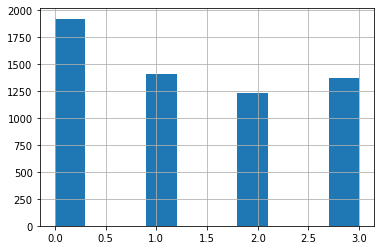

In [7]:
train_annot.annotation_class.hist()

In [10]:
print(train_annot.groupby('annotation_class')["annotation_id"].nunique())
1230+1405+1923

annotation_class
0    1923
1    1405
2    1230
3    1368
Name: annotation_id, dtype: int64


4558

In [9]:
train_metadata = pd.read_csv("/home/sheh/datasets/TissueNet/train_metadata.csv")
train_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       1015 non-null   object 
 1   width          1015 non-null   int64  
 2   height         1015 non-null   int64  
 3   resolution     1015 non-null   float64
 4   magnification  1015 non-null   int64  
 5   tif_cksum      1015 non-null   int64  
 6   tif_size       1015 non-null   int64  
 7   us_wsi_url     1015 non-null   object 
 8   us_tif_url     1015 non-null   object 
 9   us_jpg_url     1015 non-null   object 
 10  eu_wsi_url     1015 non-null   object 
 11  eu_tif_url     1015 non-null   object 
 12  eu_jpg_url     1015 non-null   object 
 13  asia_wsi_url   1015 non-null   object 
 14  asia_tif_url   1015 non-null   object 
 15  asia_jpg_url   1015 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory usage: 127.0+ KB


In [10]:
train_metadata.head()

filename   width  height  resolution  magnification  tif_cksum  \
0  C06_B108_S21.tif  142848   54272    0.227175             40  829130746   
1  C13_B156_S11.tif  271950  294038    0.242535             20  170934639   
2  C13_B145_S11.tif  271950  294038    0.242535             20  959340768   
3  C13_B141_S11.tif  271950  294038    0.242535             20  104195472   
4  C06_B116_S21.tif  166656  108800    0.227175             40  395797192   

     tif_size                                         us_wsi_url  \
0   448839470  s3://drivendata-competition-sfp-public/train/w...   
1  1916702702  s3://drivendata-competition-sfp-public/train/w...   
2  2002558290  s3://drivendata-competition-sfp-public/train/w...   
3  2344937334  s3://drivendata-competition-sfp-public/train/w...   
4  1772752422  s3://drivendata-competition-sfp-public/train/w...   

                                          us_tif_url  \
0  s3://drivendata-competition-sfp-public/train/t...   
1  s3://drivendata-competition-sfp-public/train/t...   
2  s3://drivendata-competition-sfp-public/train/t...   
3  s3://drivendata-competition-sfp-public/train/t...   
4  s3://drivendata-competition-sfp-public/train/t...   

                                          us_jpg_url  \
0  s3://drivendata-competition-sfp-public/train/d...   
1  s3://drivendata-competition-sfp-public/train/d...   
2  s3://drivendata-competition-sfp-public/train/d...   
3  s3://drivendata-competition-sfp-public/train/d...   
4  s3://drivendata-competition-sfp-public/train/d...   

                                          eu_wsi_url  \
0  s3://drivendata-competition-sfp-public-eu/trai...   
1  s3://drivendata-competition-sfp-public-eu/trai...   
2  s3://drivendata-competition-sfp-public-eu/trai...   
3  s3://drivendata-competition-sfp-public-eu/trai...   
4  s3://drivendata-competition-sfp-public-eu/trai...   

                                          eu_tif_url  \
0  s3://drivendata-competition-sfp-public-eu/trai...   
1  s3://drivendata-competition-sfp-public-eu/trai...   
2  s3://drivendata-competition-sfp-public-eu/trai...   
3  s3://drivendata-competition-sfp-public-eu/trai...   
4  s3://drivendata-competition-sfp-public-eu/trai...   

                                          eu_jpg_url  \
0  s3://drivendata-competition-sfp-public-eu/trai...   
1  s3://drivendata-competition-sfp-public-eu/trai...   
2  s3://drivendata-competition-sfp-public-eu/trai...   
3  s3://drivendata-competition-sfp-public-eu/trai...   
4  s3://drivendata-competition-sfp-public-eu/trai...   

                                        asia_wsi_url  \
0  s3://drivendata-competition-sfp-public-asia/tr...   
1  s3://drivendata-competition-sfp-public-asia/tr...   
2  s3://drivendata-competition-sfp-public-asia/tr...   
3  s3://drivendata-competition-sfp-public-asia/tr...   
4  s3://drivendata-competition-sfp-public-asia/tr...   

                                        asia_tif_url  \
0  s3://drivendata-competition-sfp-public-asia/tr...   
1  s3://drivendata-competition-sfp-public-asia/tr...   
2  s3://drivendata-competition-sfp-public-asia/tr...   
3  s3://drivendata-competition-sfp-public-asia/tr...   
4  s3://drivendata-competition-sfp-public-asia/tr...   

                                        asia_jpg_url  
0  s3://drivendata-competition-sfp-public-asia/tr...  
1  s3://drivendata-competition-sfp-public-asia/tr...  
2  s3://drivendata-competition-sfp-public-asia/tr...  
3  s3://drivendata-competition-sfp-public-asia/tr...  
4  s3://drivendata-competition-sfp-public-asia/tr...

In [14]:
tmp_df = train_annot[["filename", "geometry"]].merge(
    train_metadata[["filename", "magnification", "height", "resolution"]], 
    left_on='filename', right_on='filename')

def parse_geometry(geo, img_height):
    coord = []
    for point in geo.split("((", 1)[1][:-3].split(","):
        x, y = point.strip().split(' ')
        x = float(x)
        y = float(y)
        coord.append((x, y))
    coord = np.array(coord)
    coord[:, 1] = img_height - coord[:, 1]
    coord = coord.astype(dtype=np.int32)
    coord = np.unique(coord, axis=0)
    coord = coord[coord[:, 1].argsort()]
    return coord[[0, -1], :].ravel()


def calc_reg_size(x):
    coord = parse_geometry(x.geometry, x.height)
    return coord[2] - coord[0]
    
tmp_df["region_size"] = tmp_df.apply(calc_reg_size, axis=1)
tmp_df["region_size_mag"] = tmp_df.apply(lambda x: (x.magnification, x.region_size), axis=1)
tmp_df["region_size_mk"] = tmp_df.apply(lambda x: x.region_size*x.resolution, axis=1)
tmp_df.region_size_mk.unique()

array([299.9217931 , 300.15179448, 300.01545712, 300.09767936,
       299.90945831, 299.87050474, 300.13580507, 300.05745569,
       299.83621687, 299.97790065, 300.22099458, 300.052432  ,
       299.82442863, 300.08881688, 299.7729224 , 299.83650027,
       300.11860256, 299.84650954, 300.20689304, 299.99772277,
       300.22516608, 299.95899305])

In [15]:
# def parse_geometry(geo):
#     coord = []
#     for point in geo.split("((", 1)[1][:-3].split(","):
#         x, y = point.strip().split(' ')
#         x = float(x)
#         y = float(y)
#         coord.append((x, y))
#     return np.array(coord)

def color_by_class(cls):
    if cls == 0:
        return (255, 255, 255)
    elif cls == 1:
        return (0, 0, 255)
    elif cls == 2:
        return (255, 255, 0)
    elif cls == 3:
        return (255, 0, 0)

In [26]:
train_metadata[train_metadata["filename"] == f"{image_name}.tif"]

filename   width  height  resolution  magnification   tif_cksum  \
30  C12_B127_S12.tif  130560   71424    0.230001             40  3577863152   

     tif_size                                         us_wsi_url  \
30  687893172  s3://drivendata-competition-sfp-public/train/w...   

                                           us_tif_url  \
30  s3://drivendata-competition-sfp-public/train/t...   

                                           us_jpg_url  \
30  s3://drivendata-competition-sfp-public/train/d...   

                                           eu_wsi_url  \
30  s3://drivendata-competition-sfp-public-eu/trai...   

                                           eu_tif_url  \
30  s3://drivendata-competition-sfp-public-eu/trai...   

                                           eu_jpg_url  \
30  s3://drivendata-competition-sfp-public-eu/trai...   

                                         asia_wsi_url  \
30  s3://drivendata-competition-sfp-public-asia/tr...   

                                         asia_tif_url  \
30  s3://drivendata-competition-sfp-public-asia/tr...   

                                         asia_jpg_url  
30  s3://drivendata-competition-sfp-public-asia/tr...

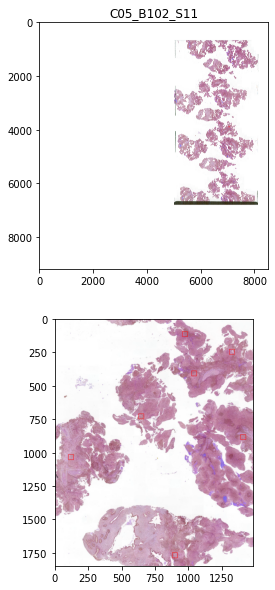

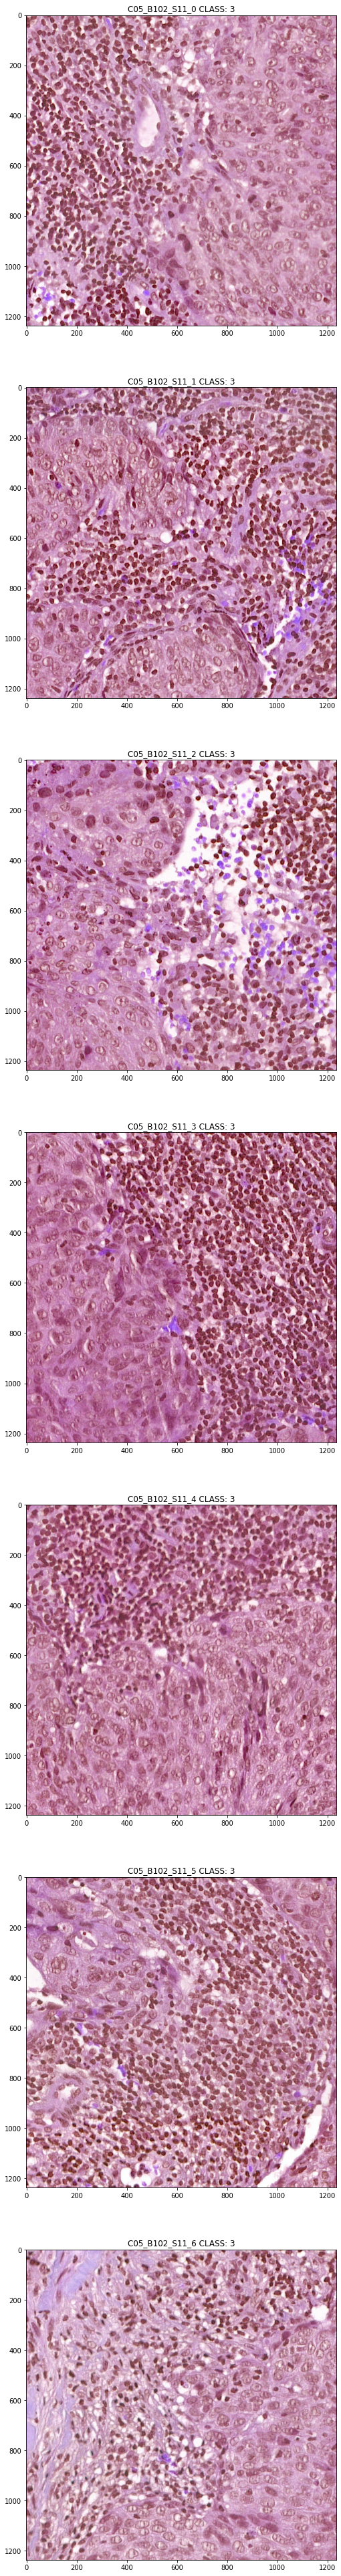

In [36]:
slide_file = np.random.choice(train_annot.filename.unique(), 1)

image_name = slide_file[0].split(".")[0]
#image_name = "C12_B127_S12"

img = cv2.imread(str(data_path / "downsampled_images" / f"{image_name}.jpg"))

all_coordinates = np.empty((1, 4), dtype=np.int32)

annotation_ids = []
annotation_cls = []
for idx in train_annot[train_annot["filename"] == f"{image_name}.tif"].index:
    h = train_metadata[train_metadata["filename"] == f"{image_name}.tif"].iat[0, 2]
    coords = parse_geometry(train_annot.iloc[idx, 2], h)
    cls = train_annot.iloc[idx, 3]
    coords = coords // 32
    all_coordinates = np.vstack((all_coordinates, coords))
    img = cv2.rectangle(img, (coords[0], coords[1]), (coords[2], coords[3]), 
                        color_by_class(cls), 2)
    annotation_ids.append(train_annot.iloc[idx, 0])
    annotation_cls.append(cls)
    
x_min = all_coordinates[1:, 0].min() - 100
x_max = all_coordinates[1:, 0].max() + 100
y_min = all_coordinates[1:, 1].min() - 100
y_max = all_coordinates[1:, 1].max() + 100
img_cut = img[y_min:y_max, x_min:x_max, :]
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.set_title(image_name)
ax1.imshow(img)
ax2.imshow(img_cut)

fig2, axes = plt.subplots(len(annotation_ids), 1, figsize=(10, 10*len(annotation_ids)))
for ax, ann_id, cls in zip(axes, annotation_ids, annotation_cls):
    img = cv2.imread(f"/home/sheh/datasets/TissueNet/annotated_regions/{ann_id}.jpeg")
    ax.set_title(f"{ann_id} CLASS: {cls}")
    ax.imshow(img)


In [37]:
from tqdm import tqdm

for fn in tqdm(train_annot.filename.unique()):
    slide_file = Path(fn).stem
    img = cv2.imread(str(data_path / "downsampled_images" / f"{slide_file}.jpg"))
    img = cv2.GaussianBlur(img, (15, 15), 0)
    noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, noise_kernel, iterations=2)
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, close_kernel, iterations=3)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h1 = np.histogram(hsv[:, :, 0], bins=180)
    h2 = np.histogram(hsv[:, :, 1], bins=255)
    h3 = np.histogram(hsv[:, :, 2], bins=255)
    1/0

  0%|          | 0/1015 [00:00<?, ?it/s]


ZeroDivisionError: division by zero

In [ ]:
plt.bar(h1[1], h1[0])

In [ ]:


max_loc = 6
pad = 0

slide_file = "C16_B007_S21"
#slide_file = Path(train_annot.filename.unique()[6]).stem
img = cv2.imread(str(data_path / "downsampled_images" / f"{slide_file}.jpg"))
img = cv2.GaussianBlur(img, (7, 7), 0)

noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, close_kernel, iterations=3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([100, 0, 0])
upper_red = np.array([180, 255, 255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)

contours, _ = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, -1, (125, 0, 0), 10)

rects = sorted(map(cv2.boundingRect, contours), key=lambda x: x[2]*x[3], reverse=True)

rects = list(filter(lambda x: (1 / 10.0) < x[2]/x[3] < (10 / 1), rects))
rects = list(filter(lambda x: x[2]*x[3]/(rects[0][2]*rects[0][3])>0.1, rects))
rects = list(map(lambda x: [
    max(int(x[0] - pad * x[2]), 0),
    max(int(x[1] - pad * x[3]), 0),
    min(int(x[0] + pad * x[2] + x[2]), width),
    min(int(x[1] + pad * x[3] + x[3]), height),
], rects))

print(f"Found rects: {len(rects)} (max={max_locs})")
rects = rects[:max_locs]

x_min = np.array(rects)[:, 0].min()
y_min = np.array(rects)[:, 1].min()
x_max = np.array(rects)[:, 2].max()
y_max = np.array(rects)[:, 3].max()

draw = img.copy()
for bb in rects:
    #contours_poly = cv2.approxPolyDP(c, 3, True)
    #boundRect = cv2.boundingRect(contours_poly)
    cv2.rectangle(draw, (bb[0], bb[1]), (bb[2], bb[3]), (255, 0, 0), 10)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(img); ax[0].set_title("image")
ax[1].imshow(mask1, cmap='gray'); ax[1].set_title("mask")
ax[2].imshow(draw[y_min:y_max,x_min:x_max]); ax[2].set_title("region")
#_ = plt.hist(hsv[:, :, 1].ravel(), bins=180)

#### Remove black lines

In [ ]:
#Image(filename="/home/sheh/datasets/TissueNet/annotated_regions/C12_B132_S12_0.jpeg")


#slide_file = Path(np.random.choice(train_annot.filename.unique(), 1)[0]).stem

max_locs = 6
pad = 0

#slide_file = Path(train_annot.filename.unique()[0]).stem
slide_file = "C13_B140_S11"
img = cv2.imread(str(data_path / "downsampled_images" / f"{slide_file}.jpg"))

height, width = img.shape[:2]
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(imgray, (25, 25), 0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=3)

contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"findContours: {len(contours)}")

for i in range(len(contours)):
    # Create a mask image that contains the contour filled in
    cimg = np.zeros_like(imgray)
    cv2.drawContours(cimg, contours, i, color=255, thickness=-1)

    # Access the image pixels and create a 1D numpy array then add to list
    pts = np.where(cimg == 255)
    s = imgray[pts[0], pts[1]].mean()
    if s < 50:
        imgray[pts[0], pts[1]] = 255

plt.imshow(imgray, cmap='gray')

#### Step 1

In [ ]:
# for i, r in enumerate(rects):
#     x1, y1, w, h = r
#     if (w/h > (10 / 1) or w/h < (1 / 10.0)) and (r[2] > 100 or r[3] > 100):
#         print(r)
#         imgray[r[1]:r[1]+r[3], r[0]: r[0]+r[2]] = 255
#     plt.subplot(len(rects), 1, i+1)
#     plt.imshow(imgray, cmap='gray')
#     ss = r[2]*r[3]

blur = cv2.GaussianBlur(imgray, (25, 25), 0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=3)

contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(img, contours, -1, (255, 0, 0), 10)
print(f"findContours: {len(contours)}")
rects = sorted(map(cv2.boundingRect, contours), key=lambda x: x[2]*x[3], reverse=True)

rects = list(filter(lambda x: (1 / 10.0) < x[2]/x[3] < (10 / 1), rects))
rects = list(filter(lambda x: x[2]*x[3]/(rects[0][2]*rects[0][3])>0.1, rects))
rects = list(map(lambda x: [
    max(int(x[0] - pad * x[2]), 0),
    max(int(x[1] - pad * x[3]), 0),
    min(int(x[0] + pad * x[2] + x[2]), width),
    min(int(x[1] + pad * x[3] + x[3]), height),
], rects))

print(f"Found rects: {len(rects)} (max={max_locs})")
rects = rects[:max_locs]

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(img); ax[0].set_title(slide_file)
ax[1].imshow(imgray, cmap='gray'); ax[1].set_title("gray")
ax[2].imshow(thresh, cmap='gray'); ax[2].set_title("thresh")

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(opening, cmap='gray'); ax[0].set_title("opening")
ax[1].imshow(close, cmap='gray'); ax[1].set_title("close")
ax[2].imshow(draw[y_min:y_max,x_min:x_max]); ax[2].set_title("region")

#### Step 2

In [ ]:

r = rects[0]
print(r)
img_lvl2 = imgray[r[0]:r[2],r[1]:r[3]]

blur = cv2.GaussianBlur(img_lvl2, (25, 25), 0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 14))
close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=3)

contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = sorted(map(cv2.boundingRect, contours), key=lambda x: x[2]*x[3], reverse=True)
contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"findContours: {len(contours)}")
cv2.drawContours(img, contours, -1, (255, 0, 0), 10)

rects = list(filter(lambda x: (1 / 10.0) < x[2]/x[3] < (10 / 1), rects))
rects = list(filter(lambda x: x[2]*x[3]/(rects[0][2]*rects[0][3])>0.1, rects))
rects = list(map(lambda x: [
    max(int(x[0] - pad * x[2]), 0),
    max(int(x[1] - pad * x[3]), 0),
    min(int(x[0] + pad * x[2] + x[2]), width),
    min(int(x[1] + pad * x[3] + x[3]), height),
], rects))

print(f"Found rects: {len(rects)} (max={max_locs})")
rects = rects[:max_locs]

x_min = np.array(rects)[:, 0].min()
y_min = np.array(rects)[:, 1].min()
x_max = np.array(rects)[:, 2].max()
y_max = np.array(rects)[:, 3].max()

draw = img.copy()
for bb in rects:
    #contours_poly = cv2.approxPolyDP(c, 3, True)
    #boundRect = cv2.boundingRect(contours_poly)
    cv2.rectangle(draw, (bb[0], bb[1]), (bb[2], bb[3]), (255, 0, 0), 10)


fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(img_lvl2, cmap='gray'); ax[0].set_title(slide_file)
ax[1].imshow(imgray, cmap='gray'); ax[1].set_title("gray")
ax[2].imshow(thresh, cmap='gray'); ax[2].set_title("thresh")

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
#ax[0].imshow(img)
ax.hist(imgray.ravel(), bins=256); ax.grid(); ax.set_title("gray hist")
#ax[2].imshow(thresh, cmap='gray')

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

ax[0].imshow(opening, cmap='gray'); ax[0].set_title("opening")
ax[1].imshow(close, cmap='gray'); ax[1].set_title("close")
ax[2].imshow(draw[y_min:y_max,x_min:x_max]); ax[2].set_title("region")

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 30)
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for _, c in enumerate(contours):
    contours_poly = cv2.approxPolyDP(c, 3, True)
    boundRect = cv2.boundingRect(contours_poly)
    cv2.rectangle(img, (int(boundRect[0]), int(boundRect[1])), \
      (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (255, 0, 0), 10)


fig, ax = plt.subplots(1, 3, figsize=(30, 30))

ax[0].imshow(thresh[slice_x, slice_y], cmap='gray')
ax[1].imshow(opening[slice_x, slice_y], cmap='gray')
ax[2].imshow(img)

In [ ]:
slide = pyvips.Image.new_from_file(path, page=0)
print(slide.width, slide.height)

In [ ]:
x, y = 0, 0
level = 2
region_width = slide.width
region_height = slide.height
region = slide.crop(x, y, region_width, region_height)

In [ ]:
array = np.ndarray(
    buffer=slide.write_to_memory(),
    dtype=np.uint8,
    shape=(region.height, region.width, region.bands)
)

In [ ]:
imshow(array)

In [ ]:
Image(filename="/home/sheh/datasets/TissueNet/downsampled_images/C06_B108_S22.jpg")

In [ ]:
train_lbl = pd.read_csv(data_path / 'train_labels.csv')
train_lbl.head()
gt = train_lbl.iloc[:, 1:].to_numpy()
gt = np.argmax(gt, axis=1)
gt

In [ ]:
pred = np.random.randint(0, 4, size=(len(train_lbl)))
pred = np.full(shape=(len(train_lbl)), fill_value=1)

In [ ]:
ERROR_TABLE = np.array([
    [0.0, 0.1, 0.7, 1.0],
    [0.1, 0.0, 0.3, 0.7],
    [0.7, 0.3, 0.0, 0.3],
    [1.0, 0.7, 0.3, 0.0]
])

er = 0
for g, p in zip(gt, pred):
    er += ERROR_TABLE[g, p]

print(f"The metric: {1-er/gt.shape[0]:.3f}")

In [ ]:
all(np.array([1,2]) == np.array([1,2]))